# Data Visualization Notebook

## Objectives
###   To conduct a study to visually differentiate a healthy cherry leaf from one with powdery mildew.


## Inputs

project5_cherryleaves/jupyter_notebooks/inputs/train
project5_cherryleaves/jupyter_notebooks/inputs/test
project5_cherryleaves/jupyter_notebooks/inputs/validation

## Outputs


- Image shape embeddings pickle file
- Mean and variability of images per label plot
- Plot to distinguish contrast between parasite-contained and uninfected cell images
- Generate code that answers business requirement 1 and can be used to build image montage on Streamlit dashboard

# Additional Comments | Insights | Conclusions

# Set Data Directory

## Import Libararies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

In [2]:
!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 164.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 151.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 150.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 161.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 58.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.24.4 which is incompatible.
tensorflow-cpu 2.6.0 requires typing-extensions~=3.7.4, but you have typing-exte

## Set Working Directory

In [3]:
import os

cwd = os.getcwd()
print("Current working directory:", cwd)


Current working directory: /workspace/project5_cherryleaves/jupyter_notebooks


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/project5_cherryleaves/jupyter_notebooks'

## Set Input Directory

In [5]:
my_data_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'


## Set Output Directory 

In [6]:
import os

# Define input directories
my_data_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/'
train_path = os.path.join(my_data_dir, 'train')
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

# Define output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Optionally, define version-specific output directory
version = 'v1'
version_output_dir = os.path.join(output_dir, version)

# Create version-specific output directory if it doesn't exist
if not os.path.exists(version_output_dir):
    os.makedirs(version_output_dir)


## Set label Names

In [9]:
import os

labels = os.listdir(train_path)
print('Labels for the images are:', labels)


Labels for the images are: ['healthy', 'powdery_mildew']


# Data visualisation of image data

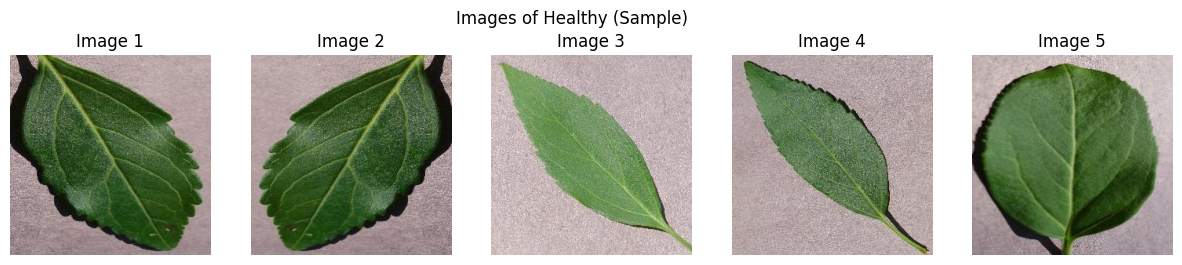

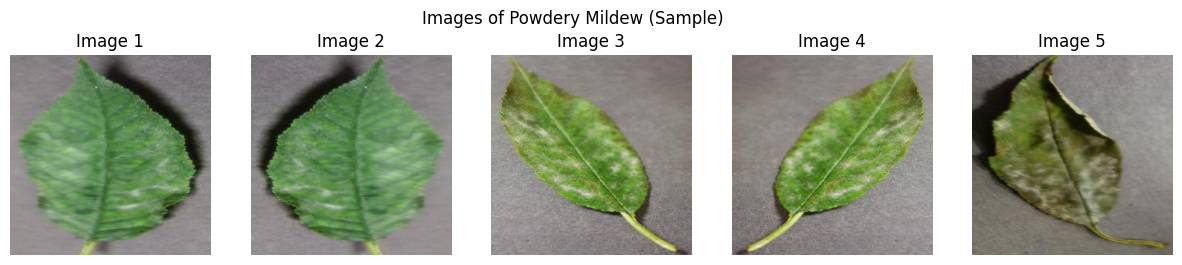

In [10]:
import os
import matplotlib.pyplot as plt
from skimage.io import imread

#  paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

#  output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/train'

# Function to visualize images in a directory and save them
def visualize_images(directory, label):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Check if there are any images in the directory
    if not image_files:
        print(f"No images found in directory: {directory}")
        return
    
    # Create output directory for the label if it doesn't exist
    output_label_dir = os.path.join(output_dir, label)
    os.makedirs(output_label_dir, exist_ok=True)
    
    # Plot the images
    num_images = min(len(image_files), 5)  # Limit to maximum 5 images for visualization
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    fig.suptitle(f'Images of {label} (Sample)')
    
    # Save and display the images
    for i in range(num_images):
        image_filename = f'image_{i+1}.jpg'  # Save as JPEG
        image_path = os.path.join(directory, image_files[i])
        image = imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f'Image {i+1}')
        
        # Save the image
        output_image_path = os.path.join(output_label_dir, image_filename)
        plt.imsave(output_image_path, image, format='jpg')

    plt.show()

# Visualize and save images in the 'healthy' directory
visualize_images(healthy_dir, 'Healthy')

# Visualize and save images in the 'powdery_mildew' directory
visualize_images(powdery_mildew_dir, 'Powdery Mildew')



## Image shape and Compute average images' size on train set

In [8]:
!pip install --upgrade numpy scikit-image


In [1]:
import os
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Function to visualize images in a directory and compute average image size
def visualize_and_compute_avg_size(directory, label):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Check if there are any images in the directory
    if not image_files:
        print(f"No images found in directory: {directory}")
        return None
    
    # Compute image shape average
    dim1, dim2 = [], []
    for image_filename in image_files:
        image_path = os.path.join(directory, image_filename)
        img = imread(image_path)
        d1, d2, _ = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width
    
    # Compute average image size
    avg_size = (int(np.mean(dim1)), int(np.mean(dim2)))
    print(f"Average image size in {label} set: {avg_size}")
    return avg_size

# Compute average image size for 'healthy' images
avg_size_healthy = visualize_and_compute_avg_size(healthy_dir, 'Healthy')

# Compute average image size for 'powdery_mildew' images
avg_size_powdery_mildew = visualize_and_compute_avg_size(powdery_mildew_dir, 'Powdery Mildew')

# Print the computed data
print("Computed data:")
print("Average size of healthy images:", avg_size_healthy)
print("Average size of powdery mildew images:", avg_size_powdery_mildew)


Average image size in Healthy set: (256, 256)
Average image size in Powdery Mildew set: (256, 256)
Computed data:
Average size of healthy images: (256, 256)
Average size of powdery mildew images: (256, 256)


## Average and variability of images per label
## Function to load images in an array (tensor)

In [4]:
!pip install --upgrade tensorflow numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 4.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 136.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 143.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 139.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 110.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 131.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 162.4 MB/s eta 0:00:0000:01
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-

In [1]:
import os
import json
import numpy as np
from skimage.io import imread
from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Define the output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs'

# Function to compute image shape average and standard deviation
def compute_image_shape(directory):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Get image shapes
    shapes = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        print(f"Loaded image: {image_file}, shape: {img_array.shape}")
    
    shapes = np.array(shapes)
    if len(shapes) > 0:
        mean_shape = np.mean(shapes, axis=0)
        std_shape = np.std(shapes, axis=0)
    else:
        mean_shape = np.nan
        std_shape = np.nan
    
    return mean_shape, std_shape

# Compute image shapes for healthy and powdery mildew sets
avg_healthy_shape, std_healthy_shape = compute_image_shape(healthy_dir)
avg_powdery_mildew_shape, std_powdery_mildew_shape = compute_image_shape(powdery_mildew_dir)

# Save computed data
computed_data = {
    'healthy': {
        'average_shape': avg_healthy_shape.tolist() if np.isnan(avg_healthy_shape).any() else None,
        'std_shape': std_healthy_shape.tolist() if np.isnan(std_healthy_shape).any() else None
    },
    'powdery_mildew': {
        'average_shape': avg_powdery_mildew_shape.tolist() if np.isnan(avg_powdery_mildew_shape).any() else None,
        'std_shape': std_powdery_mildew_shape.tolist() if np.isnan(std_powdery_mildew_shape).any() else None
    }
}

computed_data_path = os.path.join(output_dir, 'computed_data.json')
with open(computed_data_path, 'w') as f:
    json.dump(computed_data, f)

# Print average image sizes
if np.isnan(avg_healthy_shape).any():
    print("No images found in Healthy set.")
else:
    print(f"Average image size in Healthy set: ({avg_healthy_shape[0]:.0f}, {avg_healthy_shape[1]:.0f}) with std deviation: ({std_healthy_shape[0]:.2f}, {std_healthy_shape[1]:.2f})")

if np.isnan(avg_powdery_mildew_shape).any():
    print("No images found in Powdery Mildew set.")
else:
    print(f"Average image size in Powdery Mildew set: ({avg_powdery_mildew_shape[0]:.0f}, {avg_powdery_mildew_shape[1]:.0f}) with std deviation: ({std_powdery_mildew_shape[0]:.2f}, {std_powdery_mildew_shape[1]:.2f})")

output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1'
computed_data_path = os.path.join(output_dir, 'computed_data.json')


2024-05-17 20:40:43.123859: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:40:43.159799: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:40:43.160923: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 20:40:44.016782: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3)
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3)
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3)
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_180deg.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_flipTB.JPG, shape: (256, 256, 3)
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616_180deg.JPG, shape: (256, 256, 3)
Loaded image: 01958ee7-f585-4956-90aa-a40dc79102d4___JR_HL 9836.J

## Load image shape and labels in array

In [1]:
import os
import json
import numpy as np
from skimage.io import imread

# Suppress deprecation warning for np.object in TensorFlow import
import warnings
warnings.filterwarnings("ignore", message="numpy\\.object was deprecated")

from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Define the output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs'

# Function to compute image shape average and standard deviation
def compute_image_shape(directory):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Get image shapes
    shapes = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        print(f"Loaded image: {image_file}, shape: {img_array.shape}")
    
    shapes = np.array(shapes)
    if len(shapes) > 0:
        mean_shape = np.mean(shapes, axis=0)
        std_shape = np.std(shapes, axis=0)
    else:
        mean_shape = np.nan
        std_shape = np.nan
    
    return mean_shape, std_shape

# Compute image shapes for healthy and powdery mildew sets
avg_healthy_shape, std_healthy_shape = compute_image_shape(healthy_dir)
avg_powdery_mildew_shape, std_powdery_mildew_shape = compute_image_shape(powdery_mildew_dir)

# Save computed data
computed_data = {
    'healthy': {
        'average_shape': avg_healthy_shape.tolist() if np.isnan(avg_healthy_shape).any() else None,
        'std_shape': std_healthy_shape.tolist() if np.isnan(std_healthy_shape).any() else None
    },
    'powdery_mildew': {
        'average_shape': avg_powdery_mildew_shape.tolist() if np.isnan(avg_powdery_mildew_shape).any() else None,
        'std_shape': std_powdery_mildew_shape.tolist() if np.isnan(std_powdery_mildew_shape).any() else None
    }
}

computed_data_path = os.path.join(output_dir, 'computed_data.json')
with open(computed_data_path, 'w') as f:
    json.dump(computed_data, f)

# Print average image sizes
if np.isnan(avg_healthy_shape).any():
    print("No images found in Healthy set.")
else:
    print(f"Average image size in Healthy set: ({avg_healthy_shape[0]:.0f}, {avg_healthy_shape[1]:.0f}) with std deviation: ({std_healthy_shape[0]:.2f}, {std_healthy_shape[1]:.2f})")

if np.isnan(avg_powdery_mildew_shape).any():
    print("No images found in Powdery Mildew set.")
else:
    print(f"Average image size in Powdery Mildew set: ({avg_powdery_mildew_shape[0]:.0f}, {avg_powdery_mildew_shape[1]:.0f}) with std deviation: ({std_powdery_mildew_shape[0]:.2f}, {std_powdery_mildew_shape[1]:.2f})")

output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1'
computed_data_path = os.path.join(output_dir, 'computed_data.json')


2024-05-17 20:41:08.534219: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:41:08.572456: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 20:41:08.573383: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 20:41:09.450085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3)
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3)
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3)
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_180deg.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_flipTB.JPG, shape: (256, 256, 3)
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616_180deg.JPG, shape: (256, 256, 3)
Loaded image: 01958ee7-f585-4956-90aa-a40dc79102d4___JR_HL 9836.J

## Plot and save mean and variability of images per label

Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3), label: 0
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3), label: 0
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616.JPG, shape: (256, 256, 3), label: 0
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165.JPG, shape: (256, 256, 3), label: 0
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_180deg.JPG, shape: (256, 256, 3), label: 0
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_flipTB.JPG, shape: (256, 256, 3), label: 0
Loaded image: ecc0acef-85ea-49bc-9275-79880a6a0f80___JR_HL 9616_180deg.J

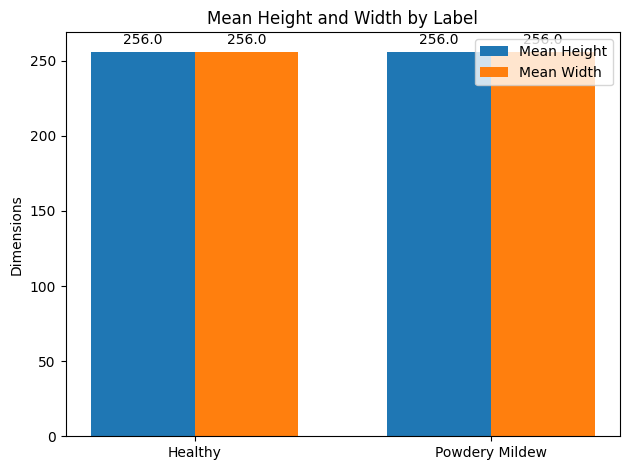

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Define the output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs'

# Function to load images and extract their shapes and labels
def load_images(directory, label):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Load images, extract shapes, and assign labels
    shapes = []
    labels = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        labels.append(label)
        print(f"Loaded image: {image_file}, shape: {img_array.shape}, label: {label}")
    
    return shapes, labels

# Load images and extract shapes and labels for healthy and powdery mildew sets
healthy_shapes, _ = load_images(healthy_dir, 0)
powdery_mildew_shapes, _ = load_images(powdery_mildew_dir, 1)

# Calculate mean and std deviation of image shapes for each label
healthy_mean_shape = np.mean(healthy_shapes, axis=0)
powdery_mildew_mean_shape = np.mean(powdery_mildew_shapes, axis=0)
healthy_std_shape = np.std(healthy_shapes, axis=0)
powdery_mildew_std_shape = np.std(powdery_mildew_shapes, axis=0)

# Plot and save mean and std deviation
labels = ['Healthy', 'Powdery Mildew']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [healthy_mean_shape[0], powdery_mildew_mean_shape[0]], width, label='Mean Height')
rects2 = ax.bar(x + width/2, [healthy_mean_shape[1], powdery_mildew_mean_shape[1]], width, label='Mean Width')

ax.set_ylabel('Dimensions')
ax.set_title('Mean Height and Width by Label')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig(os.path.join(output_dir, 'mean_dimensions_per_label.png'))
plt.show()


## Compute average and variability images

In [4]:
pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 15.0 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [3]:
!sudo apt-get install libgl1-mesa-glx

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgl1-mesa-glx


In [4]:
!sudo apt-get update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://download.docker.com/linux/ubuntu jammy InRelease [48.8 kB]       
Get:3 https://ppa.launchpadcontent.net/git-core/ppa/ubuntu jammy InRelease [24.6 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy InRelease [270 kB]                
Get:5 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,848 kB]
Get:6 https://download.docker.com/linux/ubuntu jammy/stable amd64 Packages [38.5 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,083 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.7 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,383 kB]
Get:10 https://ppa.launchpadcontent.net/git-core/ppa/ubuntu jammy/main amd64 Packages [2,971 B]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]       
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRel

In [ ]:
!sudo apt-get install libgl1-mesa-glx

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libgl1 libgl1-amber-dri libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libllvm15 libpciaccess0 libsensors-config libsensors5
  libx11-xcb1 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0
  libxcb-randr0 libxcb-sync1 libxcb-xfixes0 libxfixes3 libxshmfence1
  libxxf86vm1
Suggested packages:
  pciutils lm-sensors
The following NEW packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libgl1 libgl1-amber-dri libgl1-mesa-dri libgl1-mesa-glx
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libllvm15 libpciaccess0
  libsensors-config libsensors5 libx11-xcb1 libxcb-dri2-0 libxcb-dri3-0
  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-sync1 libxcb-xfixes0
  libxfixes3 libxshmfence

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute average and variability images
def compute_avg_and_variability_images(image_directory, output_directory):
    image_files = [f for f in os.listdir(image_directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    if len(image_files) == 0:
        print("No image files found in the specified directory.")
        return None, None

    # Read the first image to get dimensions
    first_image = cv2.imread(os.path.join(image_directory, image_files[0]))
    height, width, _ = first_image.shape
    
    # Initialize arrays for sum and sum of squares
    sum_image = np.zeros((height, width, 3), dtype=np.float64)
    sum_sq_image = np.zeros((height, width, 3), dtype=np.float64)
    
    # Compute sum and sum of squares
    for image_file in image_files:
        image = cv2.imread(os.path.join(image_directory, image_file)).astype(np.float64)
        sum_image += image
        sum_sq_image += np.square(image)
    
    # Compute average and variability images
    avg_image = (sum_image / len(image_files)).astype(np.uint8)
    var_image = np.sqrt((sum_sq_image / len(image_files)) - np.square(avg_image))
    
    # Normalize the variability image to the range of 0 to 255
    var_image_normalized = (var_image - var_image.min()) / (var_image.max() - var_image.min()) * 255
    
    # Convert the normalized variability image to uint8 data type
    var_image_uint8 = var_image_normalized.astype(np.uint8)
    
    # Save images to the output directory
    avg_image_path = os.path.join(output_directory, "average_image.png")
    var_image_path = os.path.join(output_directory, "variability_image.png")
    
    cv2.imwrite(avg_image_path, cv2.cvtColor(avg_image, cv2.COLOR_BGR2RGB))
    cv2.imwrite(var_image_path, cv2.cvtColor(var_image_uint8, cv2.COLOR_BGR2RGB))
    
    return avg_image_path, var_image_path

# Example usage
image_directory = "/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy"
output_directory = "/workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1"
avg_image_path, var_image_path = compute_avg_and_variability_images(image_directory, output_directory)

if avg_image_path and var_image_path:
    print("Average image saved to:", avg_image_path)
    print("Variability image saved to:", var_image_path)


ImportError: libGL.so.1: cannot open shared object file: No such file or directory

## Difference between powdery mildew leaves and healthy leaves

In [7]:
import os
import json
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Function to load images and extract their shapes
def load_images(directory):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Load images and extract shapes
    shapes = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        print(f"Loaded image: {image_file}, shape: {img_array.shape}")
    
    return shapes

# Load images and extract shapes for healthy and powdery mildew sets
healthy_shapes = load_images(healthy_dir)
powdery_mildew_shapes = load_images(powdery_mildew_dir)

# Calculate mean image shapes for each label
healthy_mean_shape = np.mean(healthy_shapes, axis=0)
powdery_mildew_mean_shape = np.mean(powdery_mildew_shapes, axis=0)

# Calculate the difference between the average healthy and average powdery mildew images
difference = powdery_mildew_mean_shape - healthy_mean_shape

print("Difference between average powdery mildew and average healthy images:")
print(f"Height difference: {difference[0]:.2f}")
print(f"Width difference: {difference[1]:.2f}")


Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3)
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3)
Loaded image: 005f183c-0a73-4738-91f7-c0a0e02cd9e3___JR_HL 9679.JPG, shape: (256, 256, 3)
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3)
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277_180deg.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_180deg.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_flipTB.JPG, shape: (256, 256, 3)
Loaded image: 014161fb-3c15-414b-9af3-00cb51a11d7c___JR_HL 9842_f

## Image Montage with labels

Number of images found in directory '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy': 1472


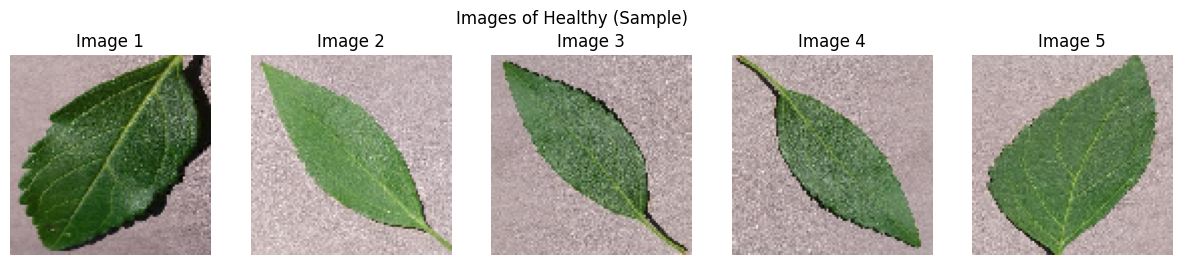

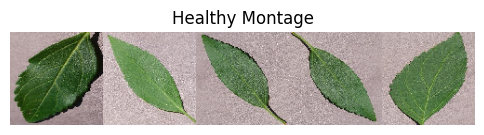

Number of images found in directory '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew': 1472


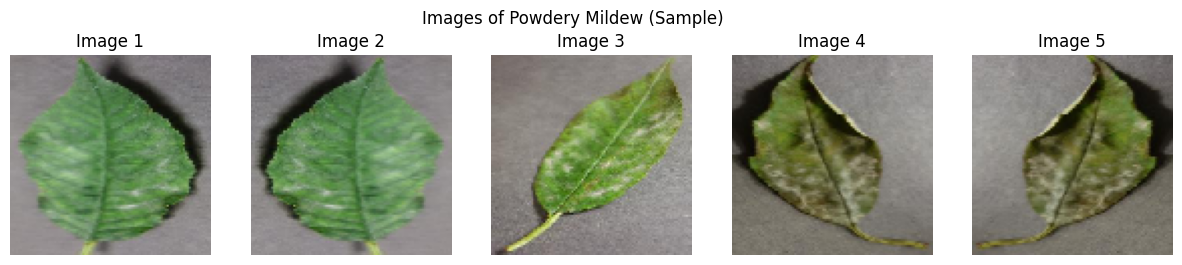

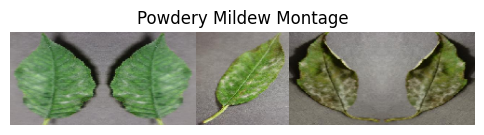

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image
from skimage.io import imread
from keras.preprocessing import image

# Define the paths to the directories containing images
healthy_input_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_input_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'
healthy_output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/train/healthy'
powdery_mildew_output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/train/powdery_mildew'

# Function to visualize images in a directory, save them, load and resize them, and create a montage
def process_images(input_directory, output_directory, label):
    # Get list of image files in the input directory
    image_files = [f for f in os.listdir(input_directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Check if there are any images in the directory
    if not image_files:
        print(f"No images found in directory: {input_directory}")
        return
    
    # Print number of images found
    print(f"Number of images found in directory '{input_directory}': {len(image_files)}")
    
    # Create output directory for the label if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)
    
    # Plot the images
    num_images = min(len(image_files), 5)  # Limit to maximum 5 images for visualization
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    fig.suptitle(f'Images of {label} (Sample)')
    
    # Load, resize, and create montage
    images = []
    for i, image_file in enumerate(image_files[:num_images]):
        input_image_path = os.path.join(input_directory, image_file)
        output_image_path = os.path.join(output_directory, image_file)
        
        # Load image
        img = image.load_img(input_image_path, target_size=(100, 100))
        
        # Resize image
        img_resized = img.resize((100, 100))
        
        # Save resized image
        img_resized.save(output_image_path)
        
        # Append resized image to list for montage
        images.append(img_resized)
        
        # Display image
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Image {i+1}')
    
    # Create image montage
    montage = create_image_montage(images)
    
    # Display montage
    plt.figure(figsize=(6, 4))
    plt.imshow(montage)
    plt.title(f'{label} Montage')
    plt.axis('off')
    plt.show()

# Function to create image montage
def create_image_montage(images, montage_shape=(1, 5), montage_size=(500, 100)):
    montage = Image.new('RGB', montage_size)
    width, height = images[0].size
    x_offset = 0
    y_offset = 0
    for img in images:
        montage.paste(img, (x_offset, y_offset))
        x_offset += width
        if x_offset >= montage_size[0]:
            x_offset = 0
            y_offset += height
    return montage

# Process images for healthy and powdery mildew sets
process_images(healthy_input_dir, healthy_output_dir, 'Healthy')
process_images(powdery_mildew_input_dir, powdery_mildew_output_dir, 'Powdery Mildew')


In [1]:
! git status


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../README.md
	modified:   DataCollection.ipynb
	modified:   DataVisualization.ipynb
	deleted:    cherry-leaves/cherry-leaves/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG
	deleted:    cherry-leaves/cherry-leaves/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_180deg.JPG
	deleted:    cherry-leaves/cherry-leaves/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG
	deleted:    cherry-leaves/cherry-leaves/healthy/002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG
	deleted:    cherry-leaves/cherry-leaves/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG
	deleted:    cherry-leaves/cherry-leaves/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG
	deleted:    cherry-leaves/cherry-l

In [4]:
!git add .

In [5]:
!git commit -am "creating the  image montage for the cherry leaves "

[main 78c4807] creating the  image montage for the cherry leaves
 8430 files changed, 31572 insertions(+), 8487 deletions(-)
 create mode 100644 jupyter_notebooks/.ipynb_checkpoints/Untitled-checkpoint.ipynb
 create mode 100644 jupyter_notebooks/Untitled.ipynb
 delete mode 100644 jupyter_notebooks/cherry-leaves/cherry-leaves/healthy/002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG
 delete mode 100644 jupyter_notebooks/cherry-leaves/cherry-leaves/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG
 delete mode 100644 jupyter_notebooks/cherry-leaves/cherry-leaves/healthy/005f183c-0a73-4738-91f7-c0a0e02cd9e3___JR_HL 9679.JPG
 delete mode 100644 jupyter_notebooks/cherry-leaves/cherry-leaves/healthy/0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277_180deg.JPG
 delete mode 100644 jupyter_notebooks/cherry-leaves/cherry-leaves/healthy/011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165.JPG
 delete mode 100644 jupyter_notebooks/cherry-leaves/cherry-leaves/healthy/011f07d1-88

In [6]:
!git push


Enumerating objects: 4597, done.
Counting objects: 100% (4597/4597), done.
Delta compression using up to 16 threads
Compressing objects: 100% (4242/4242), done.
Writing objects: 100% (4243/4243), 55.35 MiB | 24.50 MiB/s, done.
Total 4243 (delta 6), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (6/6), completed with 6 local objects.
To https://github.com/elena5875/project5_cherryleaves.git
   0a4bcc9..78c4807  main -> main
